# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Activation, add, Add, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras import optimizers

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import random
import numpy as np
import tensorflow as tf

seed=1111
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 2. Map google Drive


In [6]:
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)
# !cp -r '/content/drive/MyDrive/7202 Deep Learning/group work/HW02/' '/content/data'

# data_dir = 'drive/7202 Deep Learning/group work/HW02/' 

train_dir='BuddhastatueData/train'
validate_dir='BuddhastatueData/validate/'
test_dir='BuddhastatueData/test/'


In [7]:
print(keras.__version__)

2.10.0


# 3. Load Data

In [8]:
img_w=256
img_h=256
num_classes = 8
my_batch_size=64
chnl = 3

# # Data Augmentation
# Train data
train_datagen_aug = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    brightness_range=(0.5,0.8),
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input)

# Validate data
validate_datagen_aug = ImageDataGenerator(
    # rescale=1./255,
   preprocessing_function=preprocess_input)

# # Load Data
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(img_w, img_h),
    batch_size=my_batch_size,
    class_mode='categorical',
    shuffle=True) # for training data only

valid_generator_aug = validate_datagen_aug.flow_from_directory(
    validate_dir,
    target_size=(img_w, img_h),
    batch_size=my_batch_size,
    class_mode='categorical',
    shuffle=False)


Found 1112 images belonging to 8 classes.
Found 368 images belonging to 8 classes.


# 6. Build Deep Learning Model

In [9]:
efnb_extractor = tf.keras.applications.EfficientNetB0(weights = "imagenet", include_top=False, input_shape = (img_w, img_h, chnl))

efnb_extractor.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['normalization[0][0

# 7. Pre-Train model

In [10]:
# Recursively freeze all layers in the model
efnb_extractor.trainable = False

model = Sequential()
model.add(efnb_extractor)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.4))
model.add(Dense(num_classes,activation="softmax"))

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 4,059,819
Trainable params: 10,248
Non-trainable params: 4,049,571
_________________________________________________________________


In [11]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
import time
# save log
logdir='logsENB0_1'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Pre Training
start_time = time.time()
hist = model.fit(train_generator_aug,epochs=80 , validation_data=valid_generator_aug, callbacks=[tensorboard_callback])
end_time = time.time()
print('####################################')
print('#  Training time = %s seconds ---' % (end_time - start_time))

Epoch 1/80
 5/18 [=======>......................] - ETA: 38s - loss: 2.3109 - accuracy: 0.1187

c:\Users\toey\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 73s 4s/step - loss: 2.0999 - accuracy: 0.1942 - val_loss: 1.7332 - val_accuracy: 0.3723
Epoch 2/80
18/18 [==============================] - 66s 4s/step - loss: 1.6933 - accuracy: 0.3696 - val_loss: 1.4856 - val_accuracy: 0.5082
Epoch 3/80
18/18 [==============================] - 61s 3s/step - loss: 1.5064 - accuracy: 0.4523 - val_loss: 1.3536 - val_accuracy: 0.5299
Epoch 4/80
18/18 [==============================] - 66s 4s/step - loss: 1.3145 - accuracy: 0.5297 - val_loss: 1.2661 - val_accuracy: 0.5734
Epoch 5/80
18/18 [==============================] - 69s 4s/step - loss: 1.2441 - accuracy: 0.5612 - val_loss: 1.2014 - val_accuracy: 0.5842
Epoch 6/80
18/18 [==============================] - 68s 4s/step - loss: 1.1751 - accuracy: 0.5980 - val_loss: 1.1616 - val_accuracy: 0.6087
Epoch 7/80
18/18 [==============================] - 65s 4s/step - loss: 1.1124 - accuracy: 0.6106 - val_loss: 1.1329 - val_accuracy: 0.6250
Epoch 8/80
18/18 [=============

# Evaluate Pre-train model

In [14]:
# evaluate model
test_datagen_aug = ImageDataGenerator(
    # rescale=1./255,
   preprocessing_function=preprocess_input)

test_it = test_datagen_aug.flow_from_directory(test_dir, target_size=(img_w, img_h),
    batch_size=my_batch_size,
    class_mode='categorical')


start_time = time.time()

score = model.evaluate(test_it)

end_time = time.time()

print("Loss: ", score[0], "Accuracy: ", score[1])
print('####################################')
print('#  Inference time = %s seconds ---' % (end_time - start_time))

Found 372 images belonging to 8 classes.
6/6 [==============================] - 16s 3s/step - loss: 0.8454 - accuracy: 0.7231
Loss:  0.8453928828239441 Accuracy:  0.7231183052062988
####################################
#  Inference time = 16.658509731292725 seconds ---


# 8. Fine tuning model

In [13]:
# Unfreezing
efnb_extractor.trainable = True
set_trainable = False

for layer in efnb_extractor.layers:
    if layer.name == 'block7a_se_excite':
        set_trainable = True
    if set_trainable:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = True
        else:
            layer.trainable = False
    else:
        layer.trainable = False
        
efnb_extractor.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['normalization[0][0

In [14]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

logdir='logsENB0'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

import time
# fine tuning
start_time = time.time()
hist = model.fit(train_generator_aug,epochs=80, validation_data=valid_generator_aug, callbacks=[tensorboard_callback])
end_time = time.time()
print('####################################')
print('#  Training time = %s seconds ---' % (end_time - start_time))

Epoch 1/80
18/18 [==============================] - 62s 3s/step - loss: 0.6879 - accuracy: 0.7437 - val_loss: 0.8958 - val_accuracy: 0.6766
Epoch 2/80
18/18 [==============================] - 55s 3s/step - loss: 0.5008 - accuracy: 0.8228 - val_loss: 0.8567 - val_accuracy: 0.7310
Epoch 3/80
18/18 [==============================] - 55s 3s/step - loss: 0.4227 - accuracy: 0.8489 - val_loss: 0.8477 - val_accuracy: 0.7255
Epoch 4/80
18/18 [==============================] - 56s 3s/step - loss: 0.3381 - accuracy: 0.8813 - val_loss: 0.8022 - val_accuracy: 0.7391
Epoch 5/80
18/18 [==============================] - 55s 3s/step - loss: 0.3086 - accuracy: 0.8966 - val_loss: 0.8243 - val_accuracy: 0.7174
Epoch 6/80
18/18 [==============================] - 56s 3s/step - loss: 0.2843 - accuracy: 0.8966 - val_loss: 0.8063 - val_accuracy: 0.7391
Epoch 7/80
18/18 [==============================] - 57s 3s/step - loss: 0.2218 - accuracy: 0.9290 - val_loss: 0.8613 - val_accuracy: 0.7255
Epoch 8/80
18/18 [==

# 9. Plot Performance

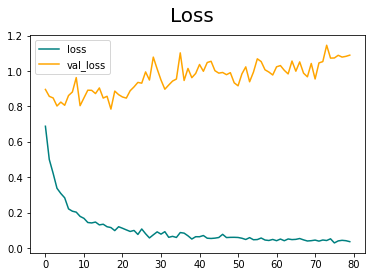

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

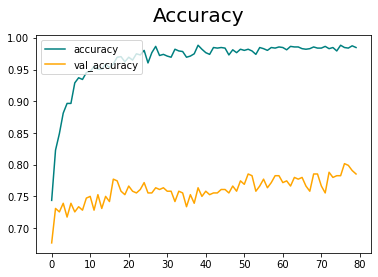

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation


In [17]:
# evaluate model
test_datagen_aug = ImageDataGenerator(
    # rescale=1./255,
   preprocessing_function=preprocess_input)

test_it = test_datagen_aug.flow_from_directory(test_dir, target_size=(img_w, img_h),
    batch_size=my_batch_size,
    class_mode='categorical')


start_time = time.time()

score = model.evaluate(test_it)

end_time = time.time()

print("Loss: ", score[0], "Accuracy: ", score[1])
print('####################################') 
print('#  Inference time = %s seconds ---' % (end_time - start_time))




Found 372 images belonging to 8 classes.
6/6 [==============================] - 13s 2s/step - loss: 0.9941 - accuracy: 0.8011
Loss:  0.9940950870513916 Accuracy:  0.801075279712677
####################################
#  Inference time = 13.511027812957764 seconds ---


# 11. Save the Model

In [18]:
from tensorflow.keras.models import load_model

In [19]:
# model.save('BuddhastatueDataimageclassifierEFNB0.h5') 
model.save_weights('BuddhastatueDataimageclassifierEFNB0.h5')

In [ ]:
new_model = tf.keras.models.load_model('models/BuddhastatueDataimageclassifierEFNB0.h5')

In [ ]:
!nvidia-smi

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)